**Regresión Lineal Simple**

**Nombre:** Carlos Hernández Márquez

**Matrícula:** 653602

**Firma de honor:**
"Doy mi palabra que he realizado esta actividad con integridad académica"

# **Introducción**  

La medición de la felicidad ha representado un reto constante debido a su carácter subjetivo y multidimensional. Aun así, desde el año 2012 el *World Happiness Report* (WHR) ha realizado un esfuerzo sistemático por estimar los niveles de felicidad en la mayoría de los países del mundo, publicando de manera abierta tanto los resultados como las bases de datos que los respaldan (John Helliwell et al., 2022).  

Dentro de este informe, el indicador de mayor relevancia es el **nivel promedio de felicidad por país**, expresado en una escala del 0 al 10. Entre los factores que se han identificado como influyentes en este nivel, destaca el **producto interno bruto (PIB, o gross domestic product, GDP)**, considerado un reflejo de la capacidad económica de cada nación. Dichos datos económicos se encuentran disponibles en fuentes oficiales como *The World Bank*, organismo internacional que concentra y distribuye estadísticas financieras globales (World bank open data, 2020).  

El propósito de este trabajo es **analizar si existe una relación estadísticamente significativa entre el nivel de felicidad y el GDP**, utilizando técnicas de regresión lineal simple. A través de la exploración, visualización y modelado de los datos, se busca evaluar la magnitud de esta relación y ejemplificar el proceso de análisis estadístico aplicado a un caso real, con el fin de consolidar aprendizajes tanto conceptuales como prácticos.  


# **Importación y exploración inicial de los datos**

Para este análisis se utilizarán las librerías `pandas`, `numpy`, `matplotlib.pyplot` y `scipy.stats` para el manejo de datos, cálculos numéricos, visualización y análisis estadístico, respectivamente, importándolas al inicio del código para mantener una mejor organización.

Se empleará la base de datos *“A1.2 Felicidad y GDP.csv”*, que contiene información sobre el **nivel de felicidad reportado en 2022** junto con el **GDP correspondiente al año 2020** para los países en los que ambos indicadores se encuentran disponibles.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
data = pd.read_csv("A1.2 Felicidad y GDP.csv")

El objetivo de este análisis es determinar si existe una relación estadísticamente significativa entre el nivel de felicidad y el GDP mediante un modelo de **regresión lineal simple**. Al tratarse de un método paramétrico, se asume una relación específica —en este caso, lineal— entre las variables $x$ (GDP) e $y$ (felicidad), lo que permite estimar la probabilidad de que la asociación observada refleje efectivamente una relación lineal en la población.  

Una primera aproximación para explorar la posible linealidad consiste en ordenar los datos de manera descendente primero por nivel de felicidad y luego por GDP. Si se observa que los países mantienen un orden relativamente similar en ambas listas, esto puede sugerir una asociación positiva inicial entre las variables. Sin embargo, este análisis solo ofrece un indicio preliminar de linealidad; la confirmación formal se realizará mediante gráficos de dispersión y el análisis de los residuos del modelo de regresión lineal simple, lo cual permitirá evaluar si la relación entre felicidad y GDP se ajusta efectivamente a un comportamiento lineal.

In [3]:
tablaFelicidad = data.sort_values(by="Felicidad", ascending=False)
tablaGDP = data.sort_values(by="GDP", ascending=False)
tablaComparativa = pd.concat([tablaFelicidad.reset_index(drop=True), 
                              tablaGDP.reset_index(drop=True)], axis=1)
tablaComparativa.head(11)

,Pais,Felicidad,GDP,Pais,Felicidad,GDP
0,Finland,7.8210,2.718370e+11,United States,6.9768,2.089370e+13
1,Denmark,7.6362,3.560850e+11,China,5.5853,1.468770e+13
2,Iceland,7.5575,2.171808e+10,Japan,6.0389,5.040110e+12
3,Switzerland,7.5116,7.522480e+11,Germany,7.0341,3.846410e+12
4,Netherlands,7.4149,9.138650e+11,United Kingdom,6.9425,2.756900e+12
5,Luxembourg,7.4040,7.335313e+10,India,3.7771,2.667690e+12
6,Sweden,7.3843,5.414870e+11,France,6.6867,2.630320e+12
7,Norway,7.3651,3.621980e+11,Italy,6.4667,1.892570e+12
8,Israel,7.3638,4.071010e+11,Canada,7.0251,1.645420e+12
9,New Zealand,7.1998,2.117350e+11,South Korea,5.9351,1.637900e+12


# **Visualización de la relación entre felicidad y GDP**

Al observar la tabla comparativa de los primeros países según nivel de felicidad y GDP, no se aprecia una correspondencia clara que sugiera una **tendencia lineal evidente**. Este análisis preliminar, basado únicamente en el ordenamiento de los datos, es insuficiente para confirmar la linealidad de la relación entre ambas variables.  

Por lo tanto, a continuación se procederá a construir un gráfico de dispersión de los datos, representando el nivel de felicidad en el eje $y$ y el logaritmo base 10 del GDP en el eje $x$. Se utiliza el logaritmo para normalizar la escala de GDP, cuya magnitud varía ampliamente entre países, facilitando así la visualización de posibles relaciones. Esta representación permitirá evaluar de manera más formal la existencia de una asociación lineal entre las variables y servirá como fundamento para la posterior aplicación del modelo de regresión lineal simple.


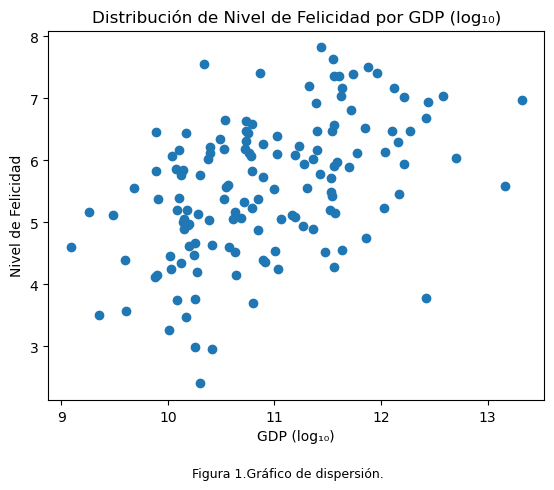

In [4]:
y = data.Felicidad
x = np.log10(data.GDP)
%matplotlib inline
plt.scatter(x, y)
plt.ylabel("Nivel de Felicidad")
plt.xlabel("GDP (log₁₀)")
plt.title('Distribución de Nivel de Felicidad por GDP (log₁₀)')
plt.figtext(0.5, -0.05, 'Figura 1.Gráfico de dispersión.', ha='center', fontsize=9)
plt.show()

# **Cálculo manual de los coeficientes de regresión**

En el gráfico de dispersión se aprecia que, aunque la relación entre el nivel de felicidad y el logaritmo base 10 del GDP muestra una tendencia lineal más evidente que en la simple comparación de órdenes, aún no es posible afirmar con certeza la existencia de una relación lineal significativa. Por esta razón, el siguiente paso consistirá en ajustar un modelo de regresión lineal simple, que permitirá cuantificar la pendiente de la relación, estimar los coeficientes del modelo y evaluar formalmente la significancia estadística de la asociación entre ambas variables.


In [5]:
xBar = np.mean(x)
yBar = np.mean(y)
B1num = sum((x-xBar)*(y-yBar))
B1den = sum((x-xBar)**2)
B1 = B1num/B1den
B0 = yBar - (B1*xBar)
print(f"β₀ = {B0:.5f}")
print(f"β₁ = {B1:.5f}")

β₀ = -1.30235
β₁ = 0.62813


A partir de los cálculos manuales se obtuvieron los coeficientes del modelo de regresión lineal simple.  

En su forma general, el modelo puede escribirse como:  
$\hat{y} = \beta_0 + \beta_1 \cdot \log_{10}(x)$  

Al sustituir los coeficientes estimados, se obtiene el modelo específico:  
$\hat{y} = -1.30235 + 0.62813 \cdot \log_{10}(x)$

El intercepto ($\beta_0 \approx -1.30$) representa el nivel estimado de felicidad cuando el valor de $\log_{10}(GDP)$ es cero. Aunque este escenario carece de interpretación práctica (pues ningún país tiene un GDP de 1 dólar), el intercepto es indispensable para que el modelo pueda ajustarse correctamente a los datos.

La pendiente ($\beta_1 \approx 0.63$) indica que, por cada incremento de una unidad en el logaritmo base 10 del GDP, el nivel promedio de felicidad de un país aumenta aproximadamente en 0.63 puntos en la escala de 0 a 10. Este resultado sugiere una asociación positiva: a mayores niveles de riqueza económica (medidos en escala logarítmica), se tiende a observar un mayor nivel de felicidad.

# **Representación gráfica del modelo de regresión**

A continuación en la Figura 2 se presentan las observaciones de los niveles de felicidad de cada país frente al logaritmo base 10 de su GDP, junto con la línea que representa el modelo de regresión lineal simple ajustado.  

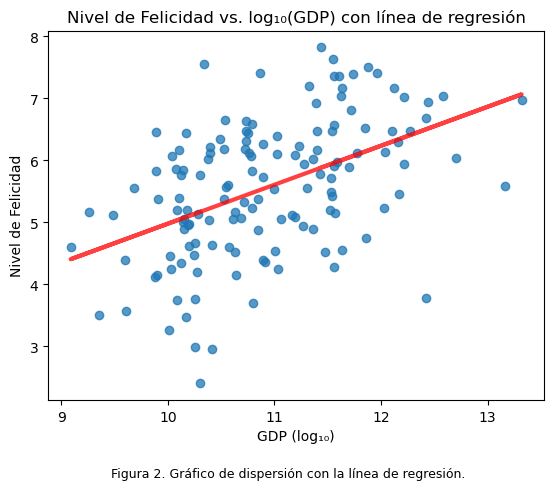

In [6]:
plt.scatter(x, y, alpha = 0.75)
plt.ylabel("Nivel de Felicidad")
plt.xlabel("GDP (log₁₀)")
plt.title('Nivel de Felicidad vs. log₁₀(GDP) con línea de regresión')
plt.figtext(0.5, -0.05, 'Figura 2. Gráfico de dispersión con la línea de regresión.', ha='center', fontsize=9)
yHat = B0 + B1*x
plt.plot(x, yHat, c="r", linewidth=3, alpha=0.75)
plt.show()

Este gráfico permite apreciar de manera visual qué tan bien el modelo se ajusta a los datos observados. Sin embargo, la evaluación visual no es suficiente para cuantificar la calidad del ajuste; por ello, el siguiente paso consiste en calcular el Residual Sum of Squares (RSS).

# **Cálculo de errores: RSS, MSE y RMSE**

El RSS mide la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por el modelo, es decir, $RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$, donde $y_i$ es el valor observado de felicidad y $\hat{y}_i$ es el valor predicho por el modelo para el mismo país.  

Un $RSS$ menor indica que la línea de regresión se ajusta mejor a los datos, mientras que un $RSS$ mayor refleja un mayor grado de desviación de los puntos respecto al modelo. Por lo tanto, calcular el $RSS$ nos permite evaluar cuantitativamente qué tan adecuada es la recta de regresión para describir la relación entre la felicidad y el GDP.

In [7]:
RSS = sum((y - yHat)**2)
print(f"RSS = {RSS:.5f}")

RSS = 131.37383


El Residual Sum of Squares ($RSS$) del modelo se obtuvo como $RSS \approx 131.37$.  

El $RSS$ mide la suma de los cuadrados de las diferencias entre los valores observados ($y_i$) y los predichos por el modelo ($\hat{y}_i$).  
Para interpretar mejor la magnitud de este desajuste en la escala de felicidad (0 a 10), calcularemos el **Mean Squared Error (MSE)** y su raíz cuadrada en Python, lo que nos permitirá cuantificar el **error promedio por país** de manera directa.  

A partir de estos resultados, podremos discutir de forma precisa si las desviaciones entre las predicciones del modelo y los valores reales se consideran bajas, moderadas o altas.


In [8]:
n = len(x)
MSE = RSS / n
print(f"MSE = {MSE:.5f}")

MSE = 0.93173


El **Mean Squared Error (MSE)** se define como el promedio de los cuadrados de los residuos del modelo:

$MSE = \frac{RSS}{n} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

donde $y_i$ son los valores observados de felicidad, $\hat{y}_i$ son los valores predichos por el modelo y $n$ es el número de observaciones.  

El MSE cuantifica el error promedio al cuadrado de las predicciones, permitiendo evaluar la precisión del modelo en la escala de los residuos. Aunque el MSE se expresa en unidades al cuadrado de la variable (en este caso puntos de felicidad al cuadrado), su interpretación se puede simplificar tomando la raíz cuadrada, obteniendo el **Root Mean Squared Error (RMSE)**, que indica el error promedio por país en la misma escala original de felicidad.



In [9]:
RMSE = np.sqrt(MSE)
print(f"RMSE = {RMSE:.5f}")

RMSE = 0.96526


El RMSE indica que, en promedio, las predicciones del modelo se desvían **menos de 1 punto** respecto a los valores observados en la escala de 0 a 10. Esto sugiere que, aunque no es un ajuste perfecto, la línea de regresión captura de manera razonable la tendencia general. 

Aunque el RMSE nos indica qué tan bien el modelo predice los valores observados en promedio, no nos dice nada sobre la **precisión de los coeficientes estimados** ($\beta_0$ y $\beta_1$) del modelo de regresión.  

Medir la precisión de los coeficientes es fundamental porque nos permite determinar **qué tan confiables son las estimaciones** de la pendiente y el intercepto. Esto es clave para inferir si la relación observada entre el nivel de felicidad y el logaritmo del GDP es consistente o si podría deberse al azar en esta muestra de países.  


# **Estimación de la precisión de los coeficientes**

El **error estándar** de un coeficiente cuantifica la variabilidad esperada de su estimación si se repitiera el estudio con diferentes muestras de la población. Un error estándar pequeño indica que el coeficiente está bien determinado y que nuestras inferencias sobre la relación entre las variables serán más confiables.

In [10]:
SEB1 = np.sqrt(RSS / ((n-2)*sum((x-xBar)**2)))
print(f"SE(β₁) = {SEB1:.5F}")

SE(β₁) = 0.09983


El error estándar de la pendiente se obtuvo como $SE(\beta_1) \approx 0.09983$, el cual cuantifica la variabilidad esperada de la estimación de la pendiente si se repitiera el estudio con diferentes muestras de países. En otras palabras, la pendiente estimada $\hat{\beta}_1$ se encuentra en promedio a $0.09983$ unidades de distancia de su valor poblacional verdadero.  

Dado que $SE(\beta_1)$ es significativamente menor que la magnitud de la pendiente estimada ($\hat{\beta}_1 = 0.62813$), la estimación se considera relativamente estable frente a la variabilidad muestral.  

# **Intervalo de confianza para la pendiente**

Con esta información, podemos construir el **intervalo de confianza del 95%** para $\beta_1$, que permite acotar un rango plausible para la pendiente poblacional y evaluar la incertidumbre de nuestra estimación. El intervalo se calcula como:

$\hat{\beta}_1 \pm t_{\alpha/2, n-2} \cdot SE(\beta_1)$

donde $t_{\alpha/2, n-2}$ es el valor crítico de la distribución t de Student con $n-2$ grados de libertad, correspondiente a un nivel de confianza del 95%. Este intervalo es esencial para determinar la precisión de la pendiente y sentar las bases para evaluar la significancia estadística de la asociación entre $\log_{10}(GDP)$ y el nivel de felicidad.

In [11]:
per = st.t.interval(confidence = 0.95, df = n-2)[1]
CIlow = B1 - per*SEB1
CIhigh = B1 + per*SEB1
print(f"Intervalo de confianza: ({CIlow:.5f}, {CIhigh:.5f})")

Intervalo de confianza: (0.43074, 0.82552)


El intervalo de confianza del 95% para la pendiente se obtuvo como $(0.431, 0.825)$, lo que indica que, con un 95% de confianza, el aumento promedio en el nivel de felicidad asociado a un incremento de una unidad en $\log_{10}(GDP)$ se encuentra entre aproximadamente $0.43$ y $0.83$ puntos en la escala de $0$ a $10$. Este rango refleja la incertidumbre muestral y sugiere que la pendiente es positiva.  

Ahora bien, además de esta estimación puntual y su intervalo, necesitamos comprobar si la asociación entre nuestras variables es estadísticamente significativa. Para verificarlo, calcularemos el estadístico $t$ y su *p-value* asociado.


In [22]:
t = B1 / SEB1
p = st.t.sf(abs(t), n - 2) * 2

print(f"t-statistic = {t:.5f}")
print(f"p-value = {p:.5e}")

t-statistic = 6.29174
p-value = 3.82572e-09


El valor de $t = 6.29$ con un p-value prácticamente nulo ($p < 0.001$) confirma que la pendiente es estadísticamente significativa. En otras palabras, el GDP tiene un efecto positivo y no aleatorio sobre la felicidad reportada.

## **Evaluación del ajuste global del modelo**

In [ ]:
RSE = np.sqrt(RSS/(n-2))
TSS = sum((y-yBar)**2)
R2 = 1 - RSS/TSS
print(f"Residual Standard Error (RSE) = {RSE:.5f}")
print(f"R² = {R2:.5f}")
TSS

Residual Standard Error (RSE) = 0.97218
R² = 0.22166


168.78798751626567

El residual standard error (RSE) se obtuvo como $RSE \approx 0.97218$, lo que indica que, en promedio, las predicciones del modelo se desvían alrededor de 0.97 puntos respecto a los valores observados en la escala de 0 a 10. Este valor sugiere que, aunque el modelo captura la tendencia general de la relación entre $\log_{10}(GDP)$ y felicidad, todavía existe una variabilidad considerable que no es explicada por el GDP.  

El coeficiente de determinación $R^2 \approx 0.22166$ indica que aproximadamente el 22\% de la variabilidad del nivel de felicidad se explica por el logaritmo del GDP. Esto refleja que, si bien existe una relación positiva entre el GDP y la felicidad, la mayor parte de la variabilidad (casi el 78\%) se debe a otros factores no incluidos en este modelo.  

En conjunto, estos resultados muestran que el modelo lineal simple proporciona evidencia de una asociación positiva significativa, pero su capacidad de ajuste es moderada, por lo que la riqueza económica no es el único determinante de la felicidad de un país.


# **Resumen**

A continuación, se presenta un resumen de los principales resultados y métricas obtenidas a lo largo del análisis. El propósito de este resumen es ofrecer una síntesis clara de todo lo visto en el documento, facilitando la interpretación de los coeficientes, errores y medidas de ajuste del modelo, de manera que se pueda comprender rápidamente la relación entre el GDP y la felicidad.

| Variable | Valor | Análisis |
|----------|-------|---------|
| $x_i$ | GDP | Variable independiente; representa la riqueza económica del país utilizada para predecir felicidad. |
| $y_i$ | Nivel de felicidad | Variable dependiente; representa la felicidad promedio de cada país que queremos explicar. |
| $\beta_0$ | -1.30235 | Valor base de felicidad cuando $\log_{10}(GDP)=0$. Aunque no tiene sentido práctico, es necesario para el ajuste del modelo. |
| $\beta_1$ | 0.62813 | Por cada aumento de 1 unidad en $\log_{10}(GDP)$, la felicidad promedio aumenta aproximadamente 0.63 puntos. |
| $\hat{y}_i$ | N/A | Felicidad predicha por el modelo para cada país según su GDP. |
| RSS | 131.37383 | Total de desviaciones al cuadrado; indica que las predicciones se alejan en conjunto 131.37 unidades de los valores reales. |
| MSE | 0.93173 | Error promedio al cuadrado por observación; muestra que, en promedio, cada predicción tiene un error cuadrático de ~0.93. |
| RMSE | 0.96526 | Las predicciones se desvían alrededor de 0.97 puntos de la felicidad real en la escala 0-10. |
| $SE(\beta_1)$ | 0.09983 | Error estándar de la pendiente; la estimación de 0.628 es relativamente estable frente a la variabilidad muestral. |
| Intervalo de confianza (95%) | (0.43074, 0.82552) | Con 95% de confianza, el verdadero efecto del GDP sobre la felicidad está entre 0.43 y 0.83 puntos. Confirma que la pendiente es positiva. |
| t | 6.29174 | Estadístico t elevado; indica que la pendiente es significativamente distinta de cero. |
| p | 3.82572e-10 | Valor-p extremadamente pequeño; la probabilidad de que la relación observada ocurra por azar es prácticamente nula. |
| RSE | 0.97218 | Desviación promedio de las predicciones respecto a los valores reales, ajustada por grados de libertad; indica la variabilidad no explicada por el modelo. |
| TSS | 168.7879 | Variabilidad total de la felicidad respecto a su media; referencia para evaluar qué proporción explica el modelo. |
| $R^2$ | 0.22166 | El GDP explica aproximadamente el 22% de la variación en felicidad; el resto se debe a factores no incluidos en el modelo. |



Una manera más rápida y eficiente de realizar todo el análisis anterior, incluyendo el cálculo de los coeficientes, errores estándar, intervalos de confianza, RSE y $R^2$, es utilizando la librería **statsmodels** en Python. Con la función `OLS()` podemos ajustar directamente un modelo de regresión lineal ordinaria y obtener de manera automática un resumen completo de todos los resultados relevantes. Esto permite no solo agilizar los cálculos, sino también generar un informe sintético que resume la relación entre el GDP y la felicidad de manera profesional y confiable.

In [20]:
import statsmodels.api as sm
model = sm.OLS(y,sm.add_constant(x))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     39.59
Date:                Sun, 17 Aug 2025   Prob (F-statistic):           3.83e-09
Time:                        23:18:32   Log-Likelihood:                -195.09
No. Observations:                 141   AIC:                             394.2
Df Residuals:                     139   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3024      1.094     -1.191      0.2

## **Extra**

En algunos casos, el resumen estándar del modelo (`results.summary()`) puede mostrar *p-values* iguales a 0.000 debido a la limitación de cifras significativas, lo que dificulta evaluar con precisión la significancia estadística de los coeficientes. Para obtener valores más exactos, se puede usar la función `results.pvalues`, que devuelve los *p-values* con mayor detalle. Asimismo, el Residual Standard Error (RSE) no se muestra directamente en el resumen, pero puede calcularse fácilmente a partir de `results.scale**0.5`, proporcionando una medida precisa de la desviación promedio de las predicciones del modelo respecto a los valores observados.


In [15]:
print("\nP-values con más precisión:")
print(results.pvalues)
RSE = results.scale**0.5
print(f"\nResidual Standard Error (RSE) = {RSE:.5f}")


P-values con más precisión:
const    2.357975e-01
GDP      3.825718e-09
dtype: float64

Residual Standard Error (RSE) = 0.97218


# **Bibliografia**

John Helliwell, Richard Layard, Jeffrey D. Sachs, Jan-Emmanuel De Neve, Lara B. Aknin, Shun Wang, & Sharon Paculor. (2022). World happiness report 2022.

Statistics by Jim. (s. f.). Root Mean Square Error (RMSE). Recuperado de página web especializada.

World bank open data. (2020). World Bank Open Data. https://data.worldbank.org

